# K-Means Clustering: Music Genres
#### Eric Zander (ericzander.ml@gmail.com)

---

> This notebook contains examples of k-means clustering using data extracted from 30 second snippets of songs from varying genres. This is mostly to demonstrate how k-means works and applications of clustering.

*Data Source: https://www.kaggle.com/insiyeah/musicfeatures?select=data.csv*

---

## Table of Contents

- [Setup](#chapter1)
- [Clustering with Two Features](#chapter2)
- [Clustering with N Features](#chapter3)

---

## 1. Setup <a class="anchor" id="chapter1"></a>

***Import Packages***

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import custom k-means module
import sys
sys.path.append('../')
from kmeans import kmeans

***Load Data***

In [3]:
# Load data
music = pd.read_csv("music_genres.csv")
music

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


***Identify Features, Null Values, and Genres***

In [4]:
# Identify features and check for null values
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

> It appears there are up to 28 continuous features we can cluster with, with 20 of them being "mel frequency cepstral coefficients." There are 1000 total values, with none of them being null.

In [5]:
# Identify the different genres
print(music.label.value_counts())

classical    100
rock         100
hiphop       100
metal        100
blues        100
pop          100
disco        100
country      100
reggae       100
jazz         100
Name: label, dtype: int64


***Defining Goals***

> There are 10 different genres with 100 samples each. Though one goal could involve developing a model that predicts genre via classification algorithms, we will see what clustering with k = 10 yields. We can also change k to gain other insights. But first, let's clarify how k-means clustering works using only 2 features.

---

## 2. Clustering with Two Features<a class="anchor" id="chapter2"></a>

***Tempo and Beats***

> Let's take a look at the relationship between tempo and beats.

In [61]:
def tempo_bpm_scatter(data, ax, title="Tempo vs. BPM", color="black", hue=None):
    """Plots tempo vs beats on a given axis."""
    sns.scatterplot(x=data.tempo, y=data.beats, ax=ax, alpha=0.8,
                    marker='.', color=color, palette="Set1", hue=hue)
    ax.set_title(title)
    ax.set_xlabel("Tempo")
    ax.set_ylabel("BPM")
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed')

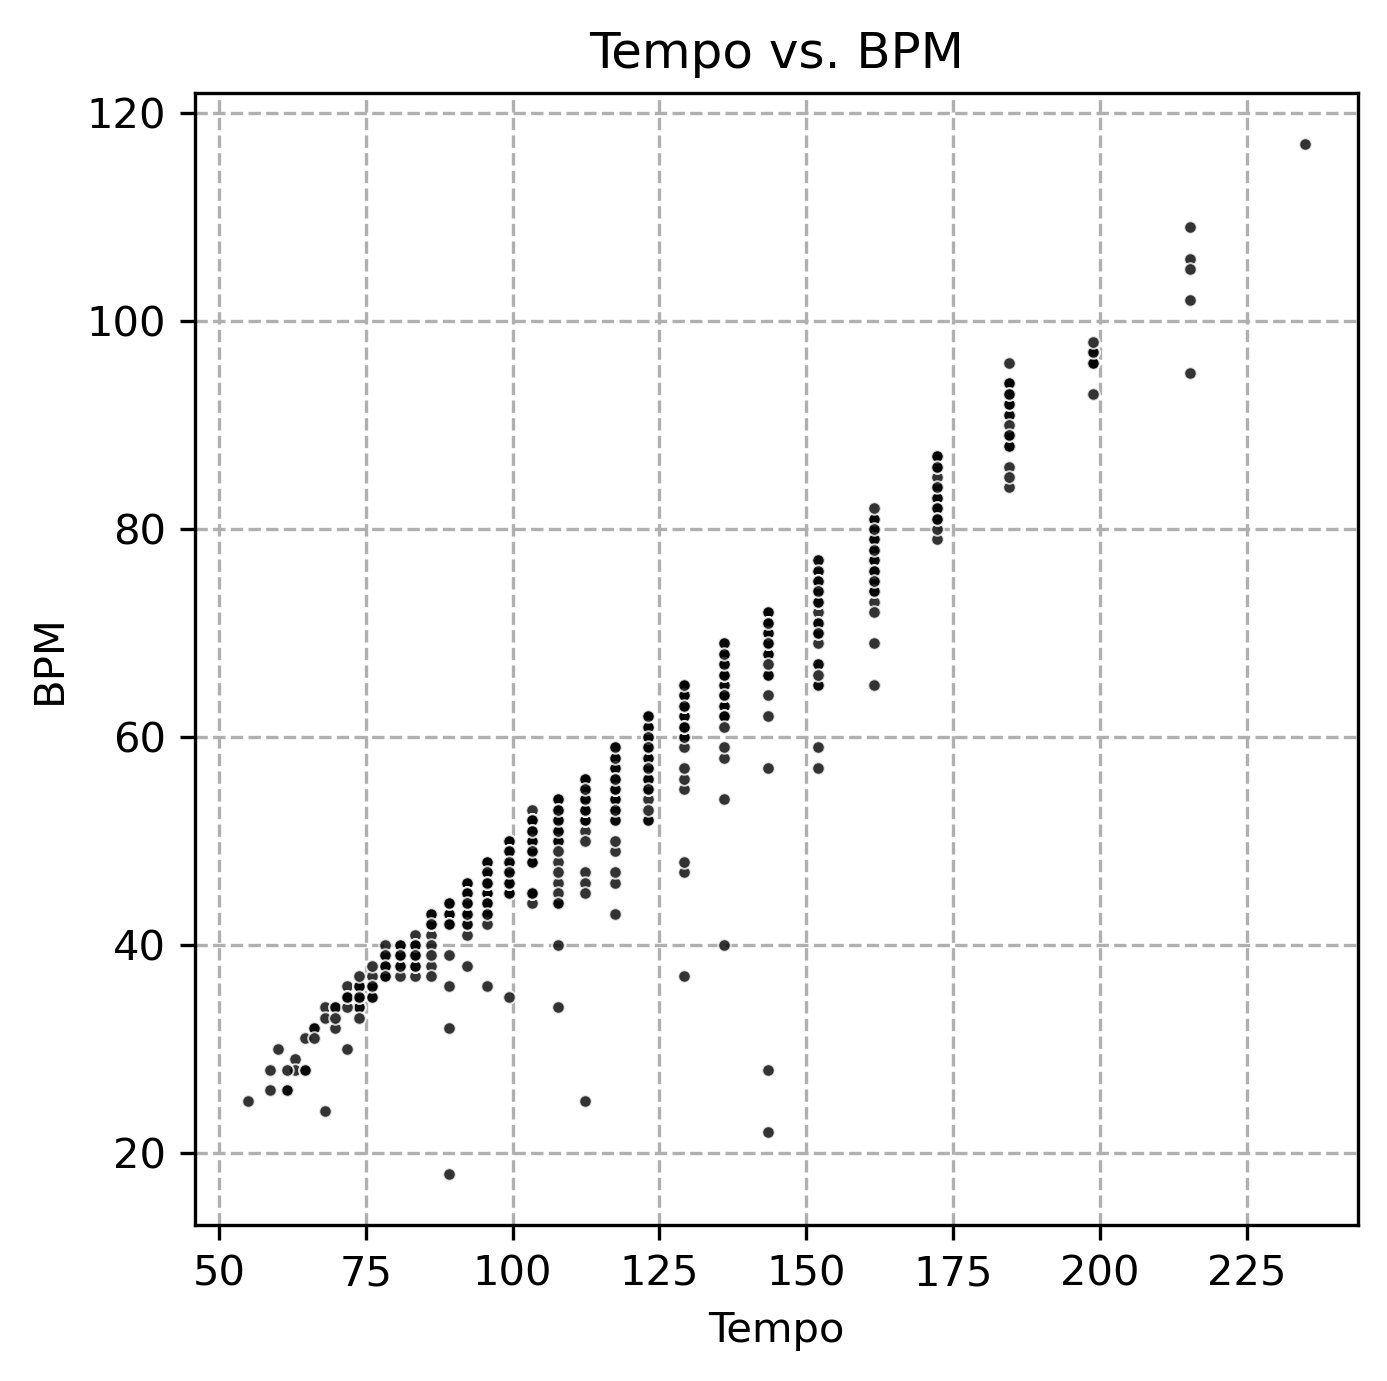

In [125]:
# Plot tempo vs beats
plt.figure(figsize=(5, 5), dpi=300)
tempo_bpm_scatter(music, plt.gca())
plt.show()

> Right away, we can see a clear and unsurprising linear relationship between tempo and beats per minute. How would go about categorizing different songs though?

***Clustering***

> Let's split songs into three categories based on tempo and BPM.

In [135]:
# Cluster with k=3 and save labels in dataframe
km = kmeans(k=3)
music["cluster"] = km.fit(music.loc[:, ["tempo", "beats"]])

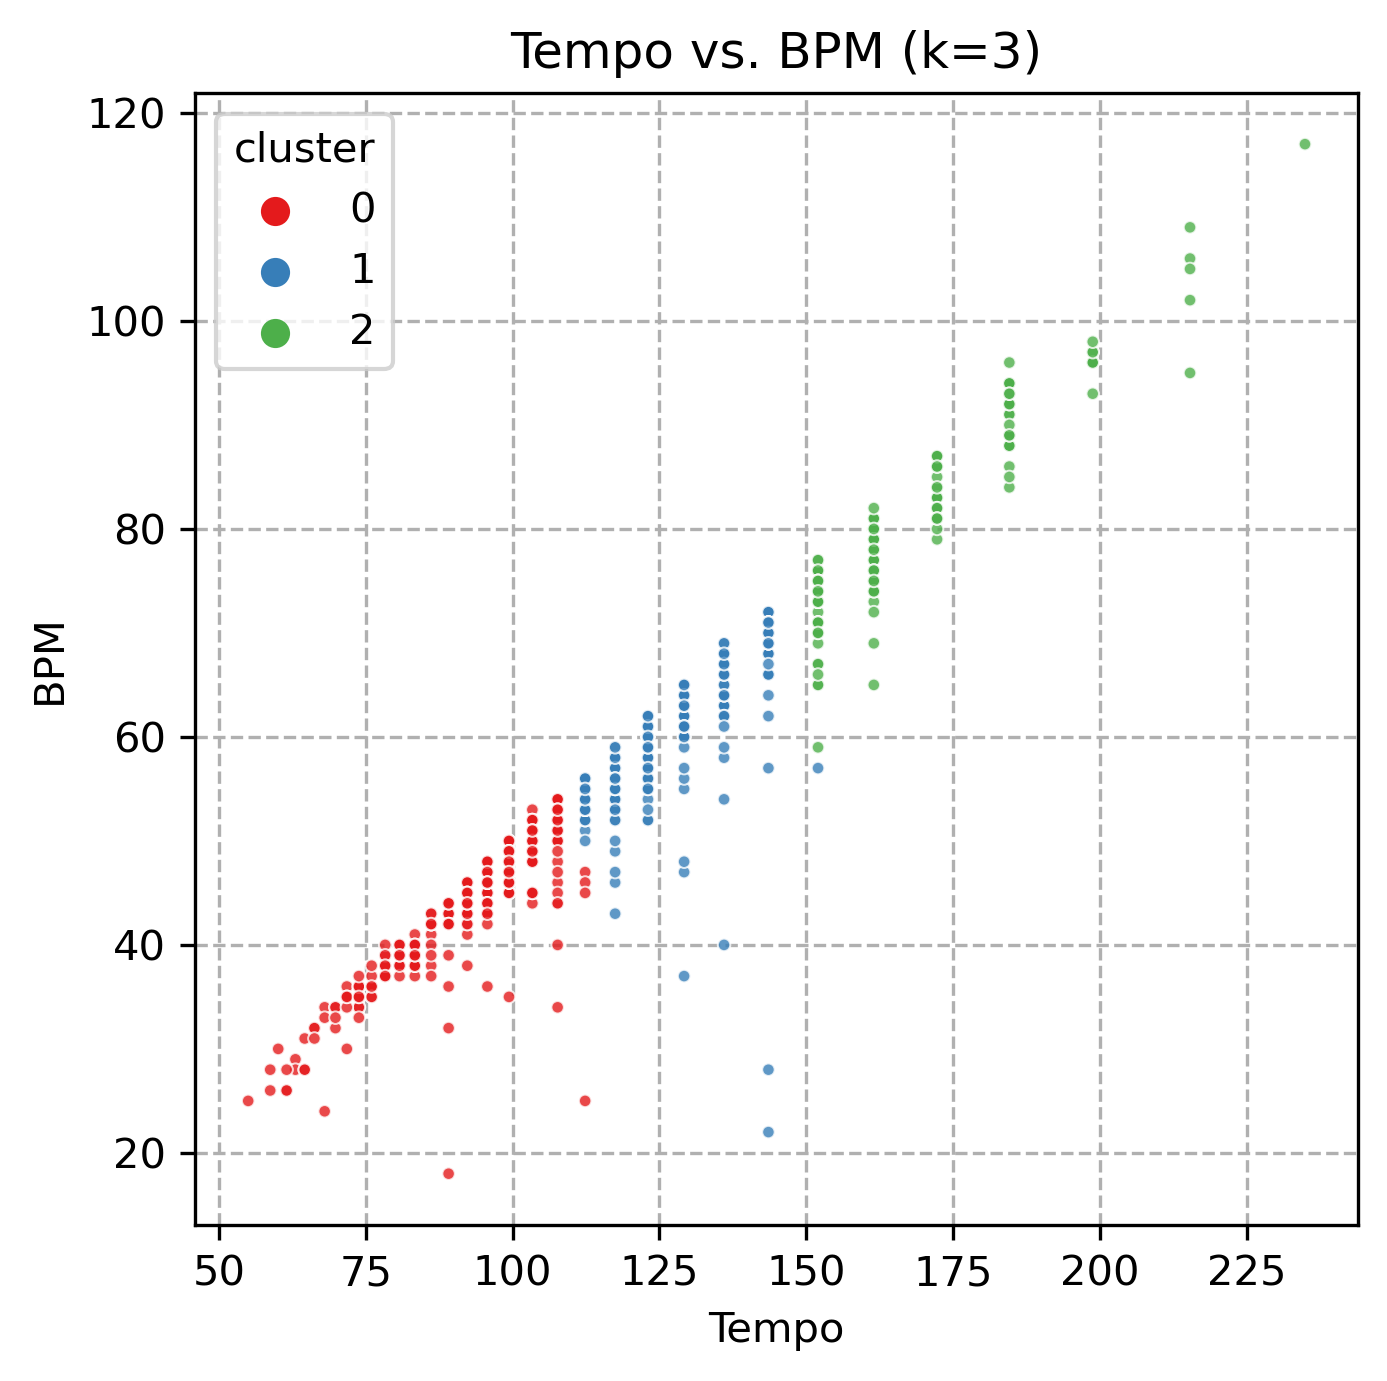

In [136]:
# Plot tempo vs beats with clusters =3
plt.figure(figsize=(5, 5), dpi=300)
tempo_bpm_scatter(music, plt.gca(), "Tempo vs. BPM (k=3)", hue=music.cluster)
plt.show()

> Here you can see the general idea behind clustering. When the model is initialized with k=3, all data points are split into three distinct clusters along the dimensions of the fitted data. Let's take a look at a few other values of k.

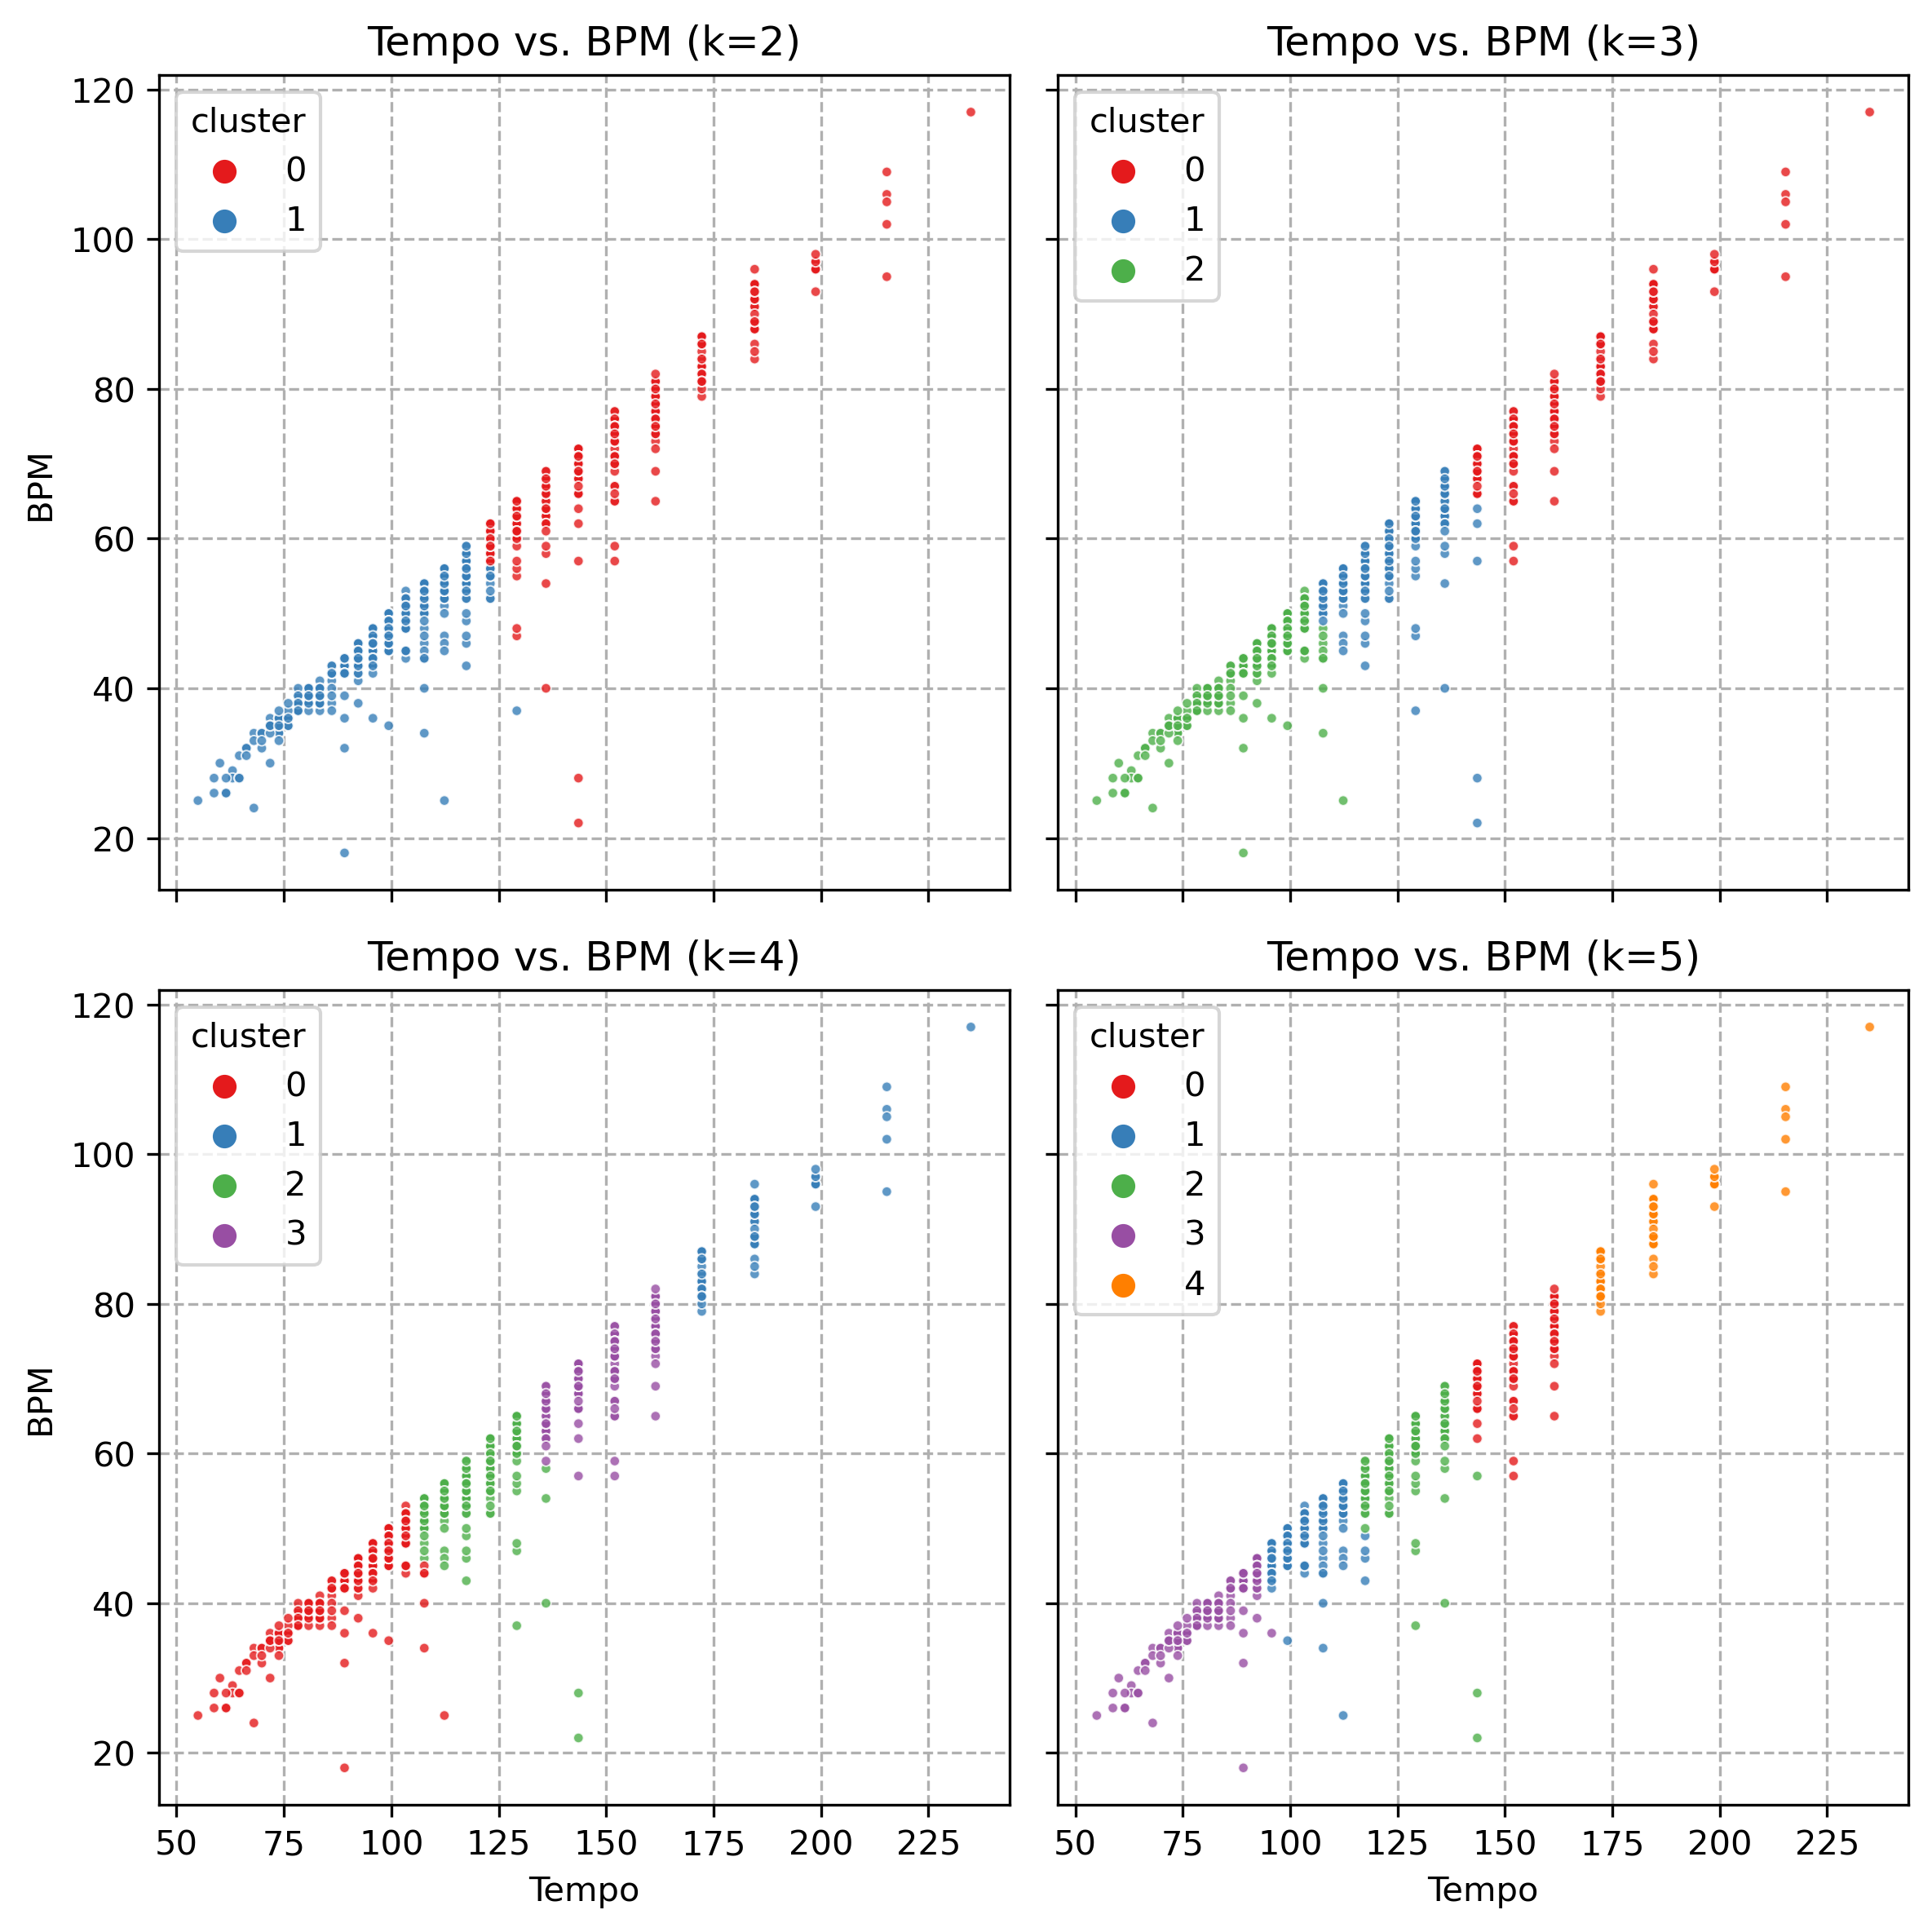

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300, sharex=True, sharey=True)

for i, ax in enumerate(axes.reshape(-1)):
    # Fit model with k clusters
    k = i + 2
    km = kmeans(k=k)
    music["cluster"] = km.fit(music.loc[:, ["tempo", "beats"]])
    
    # Plot and show
    tempo_bpm_scatter(music, ax, "Tempo vs. BPM (k={})".format(k), 
                      hue=music.cluster)

plt.tight_layout()
plt.show()

***What About Genres?***

> Now that it's clear what k-means clustering does, how might this help us get more info about music? Lets take a closer look at tempo vs. beats by genre.

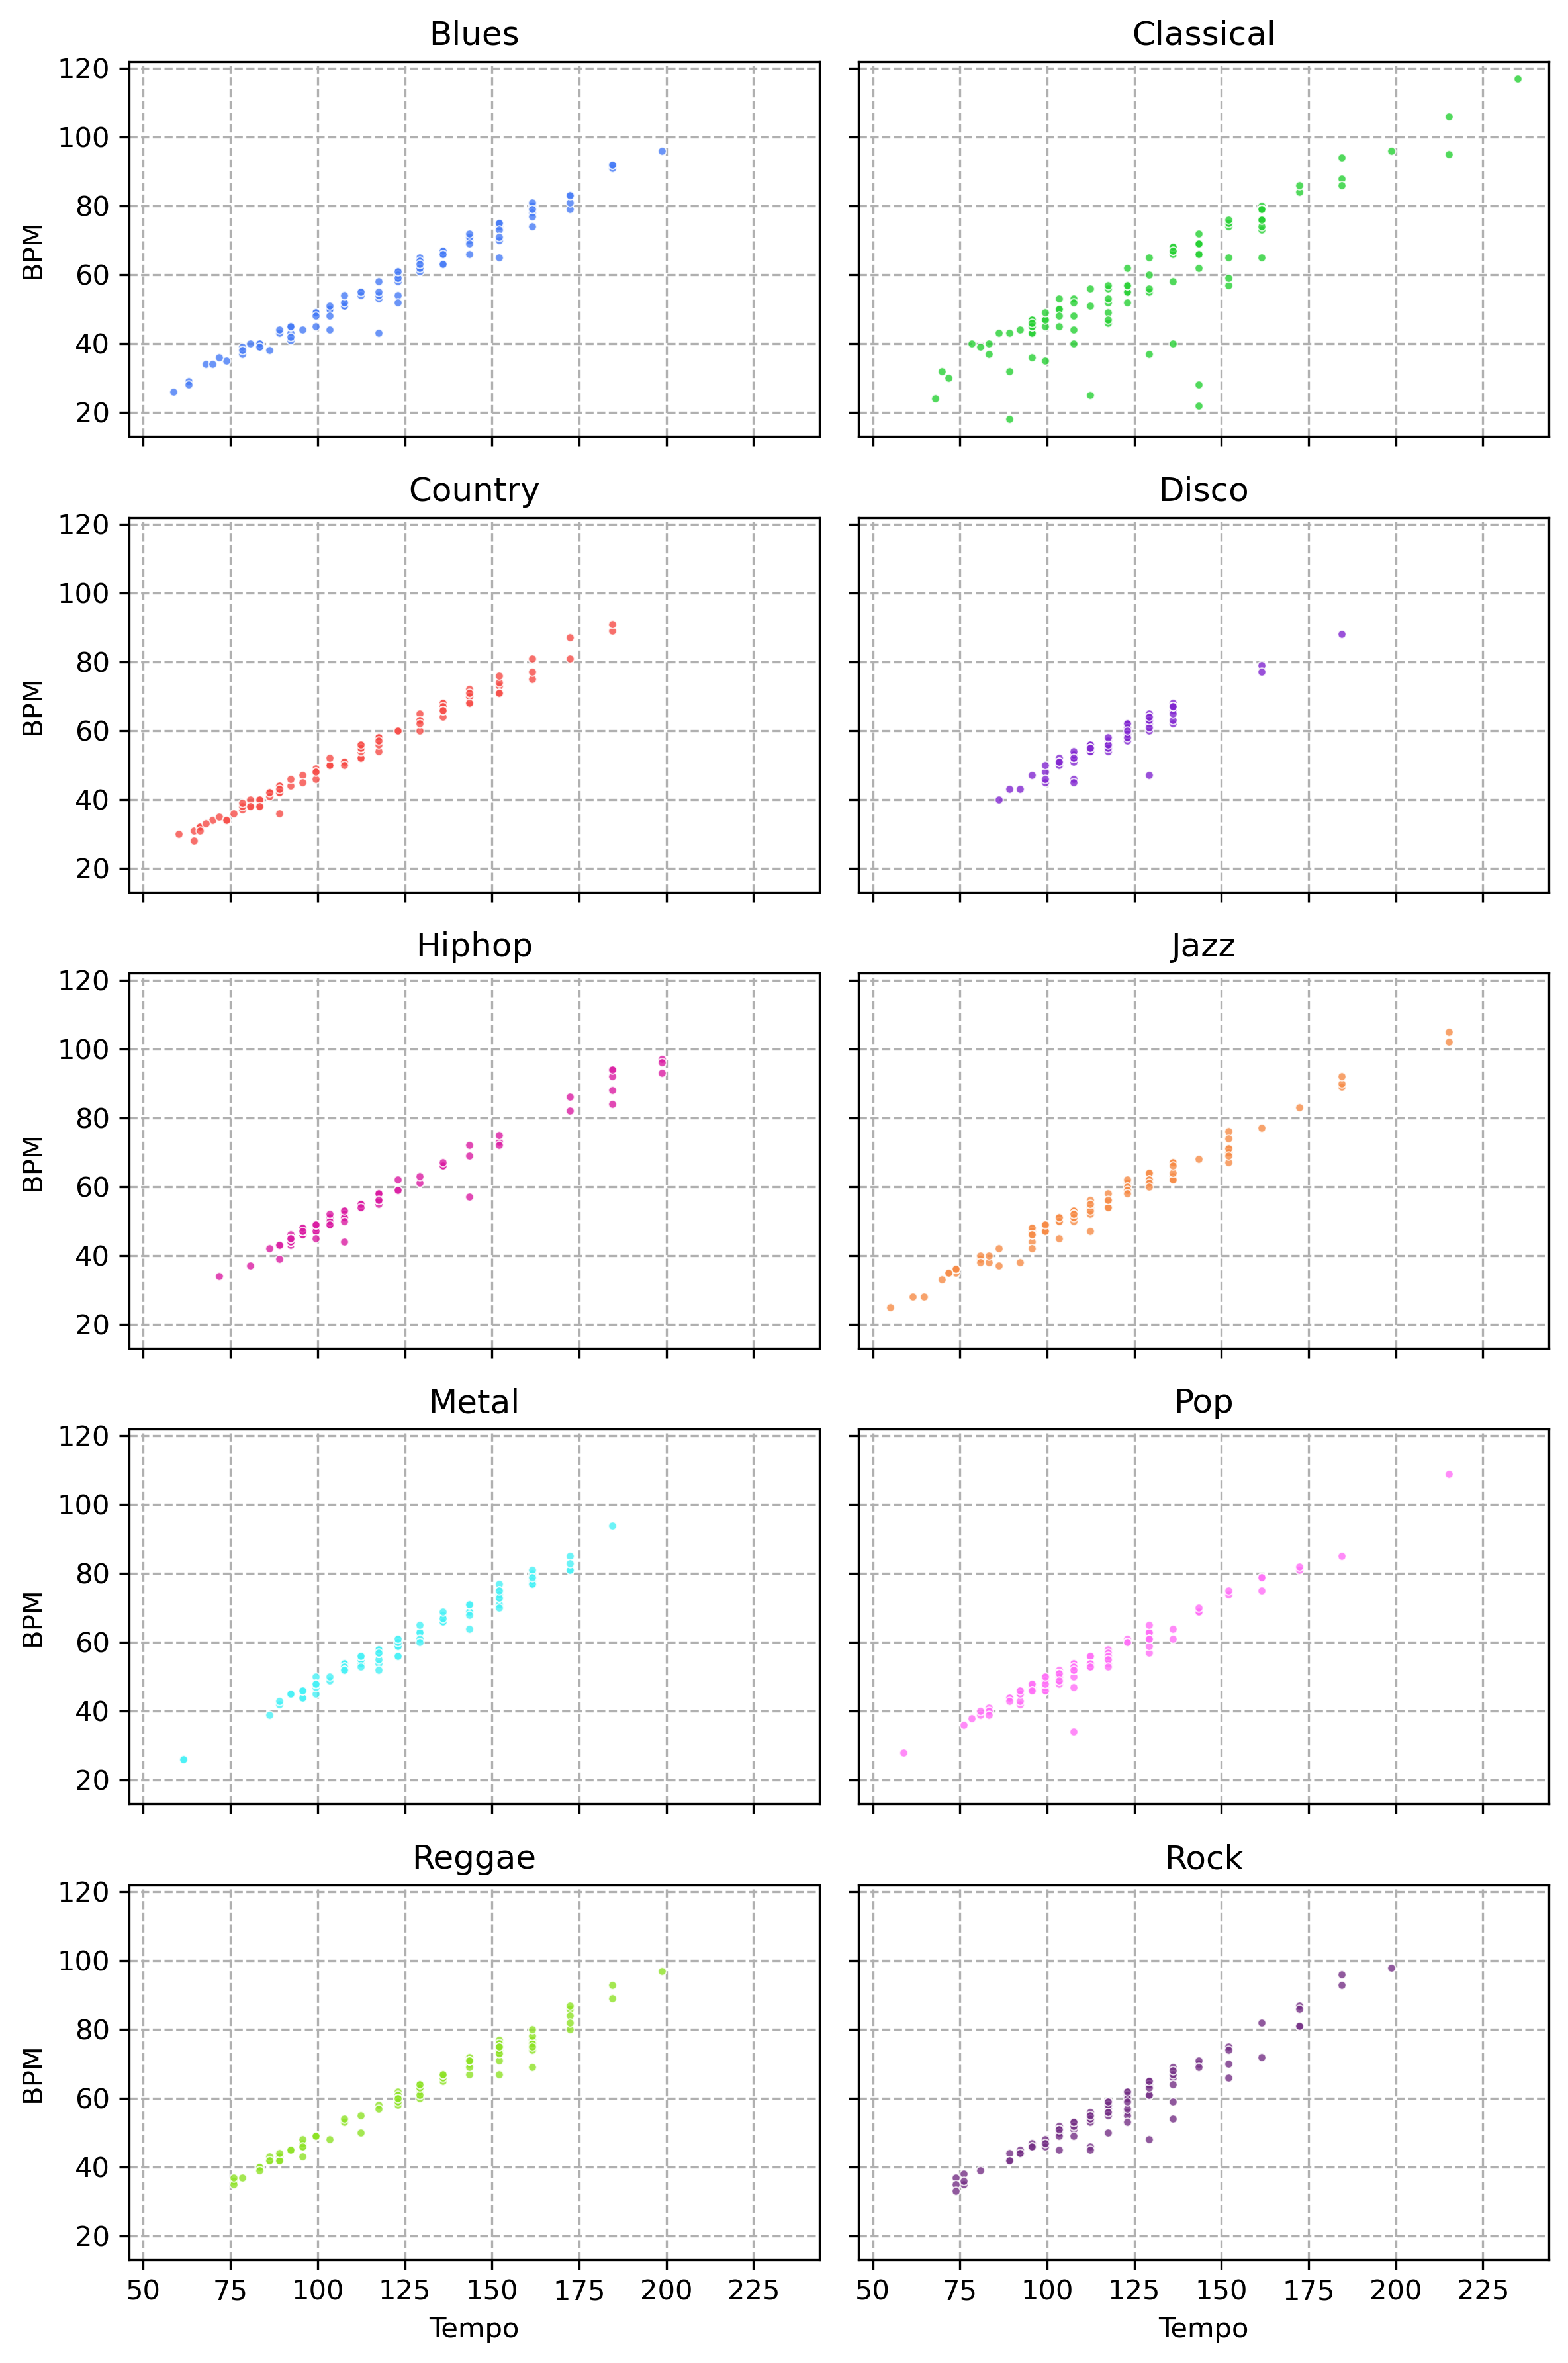

In [70]:
# Save list of genres and colors
genres = list(music.label.unique())
colors = ["#467BF6", "#26D033", "#F64B46", "#8126D0", "#DA1CA2",
          "#F68B46", "#46F1F6", "#FF6EF7", "#8DE225", "#742F85"]

# Create 10 subplots
fig, axes = plt.subplots(5, 2, figsize=(8, 12), dpi=300, 
                         sharex=True, sharey=True)

# Plot for each genre
for i, ax in enumerate(axes.reshape(-1)):
    tempo_bpm_scatter(music[music.label == genres[i]], ax, 
                      genres[i].title(), color=colors[i])
    
plt.tight_layout()
plt.show()

> Though you can begin to see differences in beats and tempo per genre, it's clear that using a higher value of k won't delineate them with these two features alone. Realistically, it may not even do so with many features. Predicting genres in this case would be better handled by classification tools like K-Nearest Neighbors or Gaussian Naive Bayes. The benefit of clustering this type of data comes from identifying novel clusters, which is why, unlike these classification methods, k-means clustering is an unsupervised algorithm. Despite this, lets try clustering at k=10 with more features and compare genres before looking for other insights.

---

## 3. Clustering with N Features <a class="anchor" id="chapter3"></a>

> Let's cluster with k=10 using all continuous features. Lets normalize all features first.

***Data Normalization***

In [223]:
# Get list of several continuous features
features = list(music.columns[1:9])
features

['tempo',
 'beats',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate']

In [163]:
# Normalize continuous features
nmusic = music.copy()
nmean = nmusic.loc[:, features].mean()
nstd = nmusic.loc[:, features].std()
nmusic.loc[:, features] = (nmusic.loc[:, features] - nmean) / nstd
nmusic.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,cluster
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-3.699041e-15,8.659740e-17,-1.000616e-15,-4.443113e-16,-2.591831e-15,2.450234e-15,-2.758487e-15,-1.256453e-15,1.191935e-15,1.334127e-15,...,-1.705303e-16,-5.369039e-16,-1.131872e-16,-8.142376e-16,3.585361e-16,1.083689e-15,3.727574e-17,-5.871970e-16,7.868151e-16,3.304000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.410522
min,-2.283722e+00,-2.751213e+00,-2.532438e+00,-1.912957e+00,-2.279318e+00,-2.554568e+00,-2.427427e+00,-1.958593e+00,-4.066266e+00,-3.226084e+00,...,-3.018593e+00,-3.685849e+00,-2.870616e+00,-2.805501e+00,-3.677915e+00,-2.913943e+00,-3.226342e+00,-4.307040e+00,-4.909454e+00,1.000000
25%,-7.144724e-01,-7.126525e-01,-7.224227e-01,-6.744767e-01,-8.017755e-01,-6.372774e-01,-7.561393e-01,-7.973450e-01,-5.608379e-01,-7.258007e-01,...,-7.477961e-01,-7.399449e-01,-6.830291e-01,-6.758877e-01,-6.562599e-01,-7.090999e-01,-6.490628e-01,-6.234737e-01,-5.923359e-01,3.000000
50%,-7.590341e-02,-7.999591e-02,5.409471e-02,-1.291139e-01,1.066336e-02,-4.018453e-02,5.522690e-02,-9.797077e-02,2.421603e-01,-3.509675e-02,...,-8.630865e-02,9.681244e-02,1.953825e-02,5.247854e-02,1.396702e-02,-2.014610e-02,4.199592e-02,-1.663704e-02,-1.571930e-02,3.000000
75%,5.794700e-01,5.702345e-01,7.016649e-01,6.830145e-01,6.845837e-01,6.382115e-01,6.111976e-01,6.781506e-01,7.041821e-01,6.492245e-01,...,7.792595e-01,7.513006e-01,6.734652e-01,7.276224e-01,6.994168e-01,6.865970e-01,6.733410e-01,6.597790e-01,6.250358e-01,5.000000
max,4.074795e+00,4.208010e+00,3.487810e+00,4.066108e+00,3.118332e+00,2.407236e+00,2.606542e+00,4.092131e+00,1.860753e+00,2.985593e+00,...,2.763898e+00,2.892854e+00,3.269818e+00,3.329186e+00,2.690657e+00,3.396751e+00,3.843788e+00,4.530782e+00,4.290183e+00,5.000000


***Attempt Clustering with k=10***

In [250]:
# Find clusters with a maximum of 10000 iterations
km = kmeans(k=10)
nmusic.cluster = km.fit(nmusic.loc[:, features])

nmusic.cluster.value_counts()

3    147
4    139
2    111
5    105
1     93
8     89
0     88
9     84
6     79
7     65
Name: cluster, dtype: int64

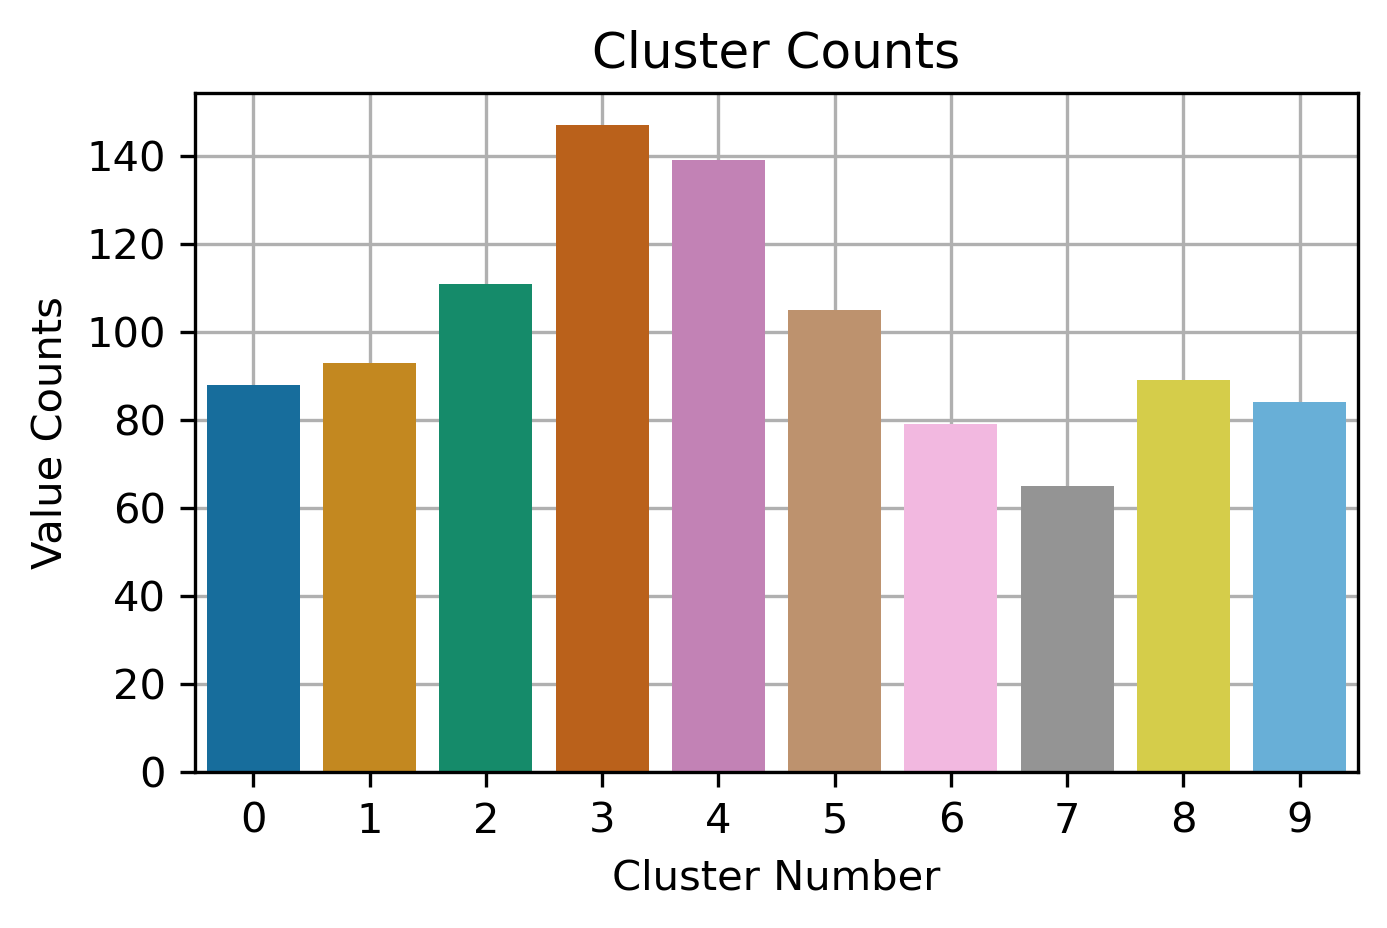

In [251]:
# Save unique cluster value counts
val_counts = nmusic.cluster.value_counts()

# Plot clusters counts
plt.figure(figsize=(5, 3), dpi=300)
sns.barplot(x=val_counts.keys(), y=val_counts.values, palette="colorblind")
plt.title("Cluster Counts")
plt.xlabel("Cluster Number")
plt.ylabel("Value Counts")
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

> Given the random initialization of clusters, clustering with more and more features with high values for k can result in wildly different value counts or even empty centroids. Though this can be partially addressed with another centroid initialization method such as k++ or by a more rigorous feature selection process, this reflects general limitations for k-means clustering when dealing with varying data. Regardless, let's see how these clusters align with genre.